In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
df=pd.read_csv('Muestras/Muestras-Daniel/Encender.csv')


In [97]:
cambios=df[df['Tiempo']=='Order'].index.tolist()
print(cambios)

[185, 371, 557, 743, 929, 1115, 1301, 1487, 1673, 1859, 2045, 2231, 2417, 2603, 2789, 2975, 3161, 3347, 3533, 3719, 3905, 4091, 4277, 4463, 4649, 4835, 5021, 5207, 5393, 5579, 5765, 5951, 6137, 6323, 6509, 6695, 6881, 7067, 7253, 7439, 7625, 7811, 7997]


In [98]:
rnd1,rnd2=random.choices(cambios,k=2)

In [99]:
def spectrogram(samples, sample_rate, stride_ms = 50.0,
                          window_ms = 500.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples,
                                          shape = nshape, strides = nstrides)

    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]

    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2

    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale

    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])

    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

Dividimos 

In [104]:
aux=df[(df.index>=rnd1-185)&(df.index<rnd1)].astype(int)
# aux[['Acx']].plot()

gesto1=aux.to_numpy()
gesto1=np.fft.fft(gesto1[:,3])
spectrogram(samples=gesto1, sample_rate=10)
freq = np.fft.fftfreq(185)
plt.plot(freq,gesto1)
plt.show()

ZeroDivisionError: integer division or modulo by zero

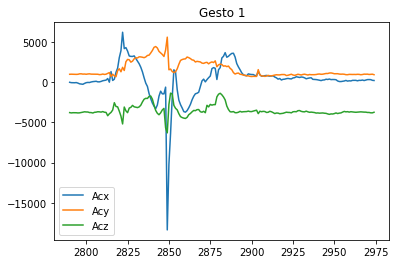

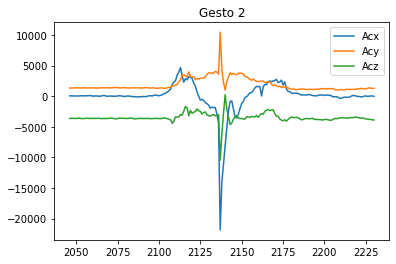

In [53]:
gesto1[['Acx','Acy','Acz']].plot(title='Gesto 1')
gesto2[['Acx','Acy','Acz']].plot(title='Gesto 2')

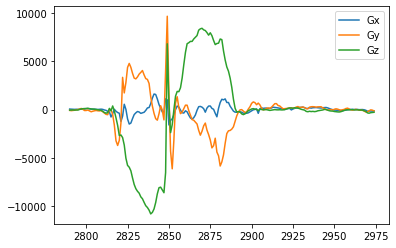

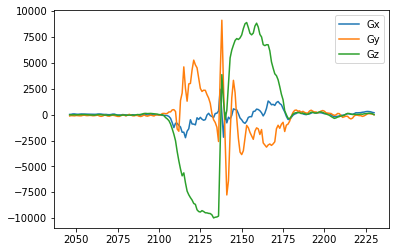

In [54]:
gesto1[['Gx','Gy','Gz']].plot()
gesto2[['Gx','Gy','Gz']].plot()